# Relativistic momentum

We have introduced the Lorentz transformation as a way to describe high-speed relative motion without violating electromagnetic theory. We know how to measure time, position, velocity, and frequency of light so that $c$ is constant and $v < c$ in all reference frames. Now we have to figure out how to change Newton's second law, $\vec{F} = \frac{d \vec{p}}{dt} = m \vec{a}$, so that forces can't accelerate objects up to speeds $v \geq c$.

Here's a toy example that shows how Newton's second law can cause problems with Einsteinian relativity. An <a href="https://www.ulalaunch.com/rockets/atlas-v">Atlas V main engine</a> has nominal thrust 860,300 lbs. With today's technology, the main engine only burns for about 300 seconds. But suppose engineers of the future figure out how to construct a rocket engine with the same thrust as the Atlas V that can burn for many days. How long would it take to accelerate an interstellar spaceship of mass 10,000 kg up to greater than light speed? Assume the propulsion system doesn't involve significant mass loss, so that mass after acceleration $\approx$ mass at launch.

Note: 10,000 kg is a little more than double the mass of the New Horizons spacecraft, which flew past Pluto in 2015 and is now journeying through the Kuiper Belt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

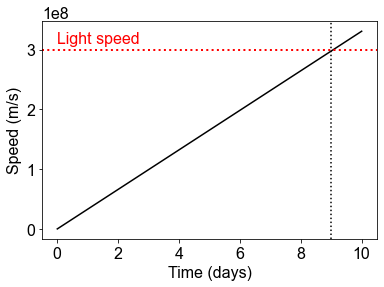

In [13]:
thrust = 860300 * constants.pound_force # constants.pound_force is the conversion from lbs to Newtons
mass = 10000 # kg

# Time in days
time = np.linspace(0, 10, num=201, endpoint=True)

# v = (F/m) * t
speed = (thrust / mass) * (time * constants.day) # constants.day is the number of seconds in a day

plt.plot(time, speed, color='k')
plt.xlabel('Time (days)')
plt.ylabel('Speed (m/s)')
plt.axhline(constants.c, color='r', ls=':', lw=2)
plt.text(0, 3.1e8, 'Light speed', color='r')
plt.axvline(9, color='k', ls=':')

If we could maintain the thrust of the Atlas V launch for nine days, we could get a 10,000-kg spacecraft up to light speed and beyond. That would be great for space exploration - we could travel to the $\alpha$ Cen system in less than a year - but it's inconsistent with Einsteinian physics.

### Let's use conservation of momentum in elastic collisions to fix Newton's second law

Consider Frank at rest in frame of reference $K$, and Mary at rest in frame $K^{\prime}$. Relative to $K$, $K^{\prime}$ moves in the $+x$ direction at speed $v$. Frank and Mary are each going to throw a ball of mass $m$ at speed $u_0$. Frank throws his <em>straight upward in frame</em> $K$, and Mary throws hers <em>straight downward</em> <em>in frame</em> $K^{\prime}$. The two balls collide elastically: after the collision, Frank sees his ball rebound straight downward in $K$, while Mary sees her ball rebound straight upward in $K^{\prime}$. To an observer at rest in frame $K$, the collision looks like this:

(-1.173, 1.203, -0.173, 2.203)

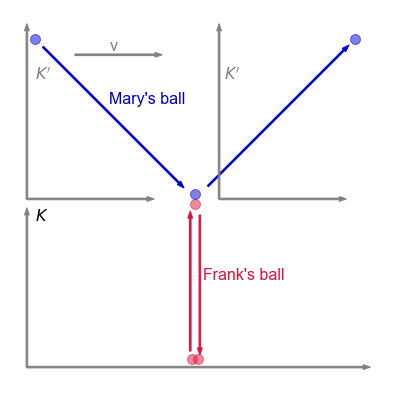

In [40]:
# Create figure
plt.figure(figsize=(7,7))

# Positions of Frank's and Mary's balls before, during, and after collision
Fball_posx = [-0.02, 0, 0.02]
Fball_posy = [0, 0.97, 0]
Mball_posx = [-1, 0, 1]
Mball_posy = [2, 1.03, 2]
plt.scatter(Fball_posx, Fball_posy, s=100, marker='o', color='crimson', alpha=0.5)
plt.scatter(Mball_posx, Mball_posy, s=100, marker='o', color='mediumblue', alpha=0.5)

# Arrows to illustrate path of Frank's ball
plt.arrow(-0.03, 0.05, 0, 0.83, color='crimson', width=0.01)
plt.arrow(0.03, 0.90, 0, -0.83, color='crimson', width=0.01)
plt.text(0.05, 0.5, "Frank's ball", color='crimson')

# Arrows to illustrate path of Mary's ball
plt.arrow(-0.95, 1.95, 0.85, -0.85, color='mediumblue', width=0.01)
plt.arrow(0.08, 1.08, 0.85, 0.85, color='mediumblue', width=0.01)
plt.text(-0.54, 1.6, "Mary's ball", color='mediumblue')

# Draw axes of frames K and K'
plt.arrow(-1.05, -0.05, 2.1, 0, width=0.01, color='gray')
plt.arrow(-1.05, -0.05, 0, 0.95, width=0.01, color='gray')
plt.text(-1, 0.87, r"$K$", color='k')
plt.arrow(-1.05, 1, 0.75, 0, width=0.01, color='gray')
plt.arrow(-1.05, 1, 0, 1.05, width=0.01, color='gray')
plt.text(-1, 1.75, r"$K^{\prime}$", color='gray')
plt.arrow(0.15, 1, 0.75, 0, width=0.01, color='gray')
plt.arrow(0.15, 1, 0, 1.05, width=0.01, color='gray')
plt.text(0.18, 1.75, r"$K^{\prime}$", color='gray')

# Draw velocity arrow
plt.arrow(-0.75, 1.9, 0.5, 0, color='gray', width=0.01)
plt.text(-0.53, 1.93, 'v', color='gray')

# Equal aspect ratio
plt.gca().set_aspect('equal')

# Turn off axis labels
plt.gca().axis('off')

Before the collision, Frank's ball has velocity $\vec{u} = +u_0 \hat{y}$ in frame $K$; after the collision, Frank's ball has velocity $\vec{u} = -u_0 \hat{y}$ in frame $K$. Thus, in frame $K$, Frank's ball has 

$\Delta \vec{p_F} = -2 m u_0 \hat{y}$. 

<em>In frame</em> $K^{\prime}$ - but not in $K$ - Mary's ball does the mirror image of Frank's ball: its pre-collision velocity is $u^{\prime} = -u_0 \hat{y}$, its post-collision velocity is $u^{\prime} = +u_0 \hat{y}$, and its change in momentum in $K^{\prime}$ is 

$\Delta \vec{p_M}^{\prime} = 2 m u_0 \hat{y}$.

To describe momentum relativistically, we need an expression for the change in momentum $\Delta p_M$ of Mary's ball <em>measured by Frank</em>. Let's try using the velocity transformation equations from our lesson on velocity addition:$^{\star}$

### $u_x = \frac{u_x^{\prime} + v}{1 + (v/c^2) u_x^{\prime}}$           (1)

### $u_y = \frac{u_y^{\prime}}{\gamma \left[ 1 + (v/c^2) u^{\prime}_x \right]}$      (2)

In $K^{\prime}$, Mary drops her ball straight down and it bounces straight back up off Frank's ball. Thus $u_x^{\prime} = 0$, which gives $u_x = v$ when substituted into Equation (1).

Plugging $u_{y0}^{\prime} = -u_0$ into Equation (2) to find the pre-collision vertical speed of Mary's ball <em>measured by Frank in frame $K$</em>, $u_x^{\prime} = 0$ gives $(v/c^2) u^{\prime}_x = 0$, which we substitute into Equation (2) to get

$u_{y0} = -u_{y0}^{\prime} / \gamma = -u_0 \sqrt{1 - v^2/c^2}$. 

After the collision, when Mary's ball is moving in the $+y^{\prime}$ direction in frame $K^{\prime}$, it has $u_x = v$ and 

$u_{yf} = u_{y0}^{\prime} / \gamma = u_0 \sqrt{1 - v^2/c^2}$

where $u_{yf}$ is the ball's <em>final</em> y-velocity after the acceleration. The speed of Mary's ball in the $x$ direction hasn't changed, so the change in momentum of Mary's ball is given entirely by the change in $y$ speed:

$\Delta p_M = m (u_{yf} - u_{y0}) = 2 m u_0 \sqrt{1 - v^2/c^2}$.

We know that momentum must be conserved during the collision: $\Delta \vec{p} = 0$. According to Einstein's postulates, the laws of physics are the same in every inertial (non-accelerating) frame, so conservation of momentum must apply in both $K$ and $K^{\prime}$. Let's see if the math we have done so far gives us a solution to the relativistic momentum problem. In frame $K$, conservation of momentum is stated as

#### $\Delta p_x = 0$,   $\Delta p_y = 0$

Where $p_x = p_{Mx} + p_{Fx}$ and $p_y = p_{My} + p_{Fy}$ ($My$ = Mary's ball, y direction, etc).

The x direction is no problem: Frank's ball has $p_{Fx} = 0$ and Mary's ball has $p_{Mx} = mv$ throughout the collision (remember we're measuring momentum in Frank's rest frame). In the y-direction we get

#### $p_{y0} = m u_0 - m u_0 \sqrt{1 - v^2/c^2}$    (pre-collision)
#### $p_{yf} = -m u_0 + m u_0 \sqrt{1 - v^2/c^2}$     (post-collision)

### Thus $\Delta p_y = -2 m u_0 + 2 m u_0 \sqrt{1 - v^2/c^2}$, which is not zero.

#### This result violates Einstein's first postulate.

$^{\star}$Recall that we derived these equations for the case when Mary, on a spaceship moving in the $+x$ direction relative to Frank's space station, was shooting a proton gun in the $+x$ direction. This is why our velocity addition equations transform $u_x^{\prime} \rightarrow u_x, u_y^{\prime} \rightarrow u_y$. To go the other direction, reverse the signs.

#### We have a problem.

Relativistically, it can't be true that $p = m v$ and $\Delta p = m \Delta v$. Let's try the same procedure we used to fix the Galilean displacement and velocity transformations. We need each value of $p$ to correspond to exactly one value of $p^{\prime}$, which means we want a linear transformation:

#### $p = \Gamma(u) m u$,

where $u$ is the speed of an object <em>measured in a reference frame</em>, not the relative speed of two frames, and $\Gamma(u)$ is a linear function of $u$ (because you can't have more than one possible $\Gamma$ for one value of $u$). To find $\Gamma(u)$, let's see what it would take to fix our conservation of momentum in the ball collision example above. In frame $K$, the momentum change of Frank's ball during the collision will be $\Delta p_F = -2 \Gamma(u_0) \, m u_0 \hat{y}$. In frame $K^{\prime}$, the momentum change of Mary's ball wil be $\Delta p_M^{\prime} = +2 \Gamma(u_0) \, m u_0 \hat{y}$. But we need $\Delta \vec{p_F} + \Delta \vec{p_M} = 0$ and $\Delta \vec{p_F}^{\prime} + \Delta \vec{p_M}^{\prime} = 0$ in order to conserve momentum in both frames (Einstein's postulates). That means $\Delta \vec{p_F} = -\Delta \vec{p_M}$, $\Delta \vec{p_F}^{\prime} = - \Delta \vec{p_M}^{\prime}$, and $\Gamma(-u_0) = \Gamma(u_0)$.

Now let's consider proper time: the shortest time possible interval for Mary's ball to travel from Mary's hand to hit Frank's ball is measured in frame $K^{\prime}$, in which Mary is at rest. (This is true for any arbitrary time interval Mary experiences, not just one related to the ball.) In frame $K$, the time required for Mary's ball to travel downward is longer. Let's say

### $\vec{p_M} = m \frac{dy^{\prime}}{dt^{\prime}} \hat{y} = m \frac{dy^{\prime}}{dt} \frac{dt}{dt^{\prime}} \hat{y}$, 

for which we use the chain rule. We need to simultaneously satisfy $\Delta p_M^{\prime} = +2 \Gamma(u_0) \, m u_0$, which requires

### $\frac{dt}{dt^{\prime}} = \Gamma(u_0)$.    (3)

We know how to do this: to transform a proper time (say the time Mary waits for her ball to hit Frank's), we use the Lorentz transformation

### $t = \frac{t^{\prime} + v y^{\prime} / c^2}{\sqrt{1 - v^2/c^2}}$.    (4)

I used $y^{\prime}$ instead of $x^{\prime}$ in the transformation because the ball is moving in the $y$ direction, but it won't matter since the term $v y^{\prime}/c^2$ doesn't show up in the derivative with respect to $t^{\prime}$. To simultaneously satisfy (3) and (4), we require

### $\Gamma(u_0) = \frac{dt}{dt^{\prime}} = \frac{1}{\sqrt{1 - u_0^2/c^2}}$.

Thus, relativistic momentum is given by

## $p = \frac{m u}{\sqrt{1 - u^2/c^2}}$,

<strong>where $u$ is the velocity of the object measured IN a frame of reference instead of the relative velocity between frames of reference.</strong>